# HW 3 :  team  Piyawan ( Jeannie )  and Ayada
*12th October, 2016*

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.dev0.


In [37]:

%matplotlib inline 
import time

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.metrics as sm
from sklearn.svm import SVC 
import sklearn.linear_model
from sklearn import grid_search
import sklearn.svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectPercentile

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from datetime import datetime

/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Step 1 :  Reading Files

In [5]:
#Reading files ( sample )
X = pd.read_csv("trainingData.txt",sep='\t',header=None)
Y = pd.read_csv("trainingTruth.txt",sep='\t',header=None)
Y = np.array(Y).ravel()
print(len(Y))
print(len(X))

17378
17378


##  1.1  Manage null values

In [6]:
df = X
print("df.shape",df.shape)

df.shape (17378, 334)


### 1.1.1 Looking for big nulls in each feature
         - Theory : If there is too many nulls in a feature, then that feature is useless
         - Result : biggest null value in each columne is only 81 from 17378 rows , thus we keep all features

In [7]:
# See if there is big na in any column
testNulldf = df.isnull().sum().order(ascending=False)
testNulldf.head()

/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


9      81
322    81
239    78
280    78
144    75
dtype: int64

### 1.1.2  Imputation 

#### * 1.1.2.1 Replace null with Zero*
        Trying out multiple approaches for the imputation.
        - zero_df : nulls are filled with 0, a constant value across the data frame
        - mean_df : nulls are filled with mean of the feature.
        - median_df : nulls are filled with median value of the feature
        - pad_df : nulls are padded with surrounding values

In [11]:
zero_df = df.fillna(0)

####  *1.1.2.2 Replace null with Mean*

In [12]:
mean_df = df.fillna(df.mean())

####  *1.1.2.3 Replace null with Median*

In [18]:
median_df = df.fillna(df.median())

####   *1.1.2.4 Replace null with its neighbour*

In [13]:
pad_df = df.fillna(method='pad')

####   *1.1.2.5  Apply standardized*
          Normalizing the data frame using mean and std. Deviation

In [14]:
standardized_df = (df - df.mean(axis=0))/  df.std(axis=0)

####   *1.1.2.6  Apply Log*

In [15]:
log_df =  df.apply(np.log1p)

## 1.2 Outliners
     - Theory : If there is too many nulls in a feature, then that feature is useless
     - Assumption : Each feature is normally distributed and keeping data with only 3 

In [16]:
df_nooutliers = pd.DataFrame( np.where( np.abs(df) > df.mean(), df.median() , df ), columns=df.columns )

## 1.3 Observing data

In [19]:
median_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,333
count,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,...,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000,17378.000000
mean,0.264561,0.456582,0.435143,0.263298,0.496518,0.356891,0.362954,0.275142,0.423000,0.454493,...,0.448364,0.481284,0.277806,0.333313,0.474397,0.273563,0.447126,0.487142,0.267614,0.389979
std,0.455194,0.512302,0.508480,0.451345,0.512481,0.494936,0.497232,0.463225,0.502766,0.512201,...,0.511349,0.519878,0.459788,0.484340,0.517393,0.459233,0.512634,0.511159,0.455598,0.503117
min,-1.560800,-1.506400,-1.399000,-1.488200,-1.442100,-1.306400,-1.884400,-1.721200,-1.444100,-1.578400,...,-1.448600,-1.398600,-1.570100,-1.847300,-1.626700,-1.865800,-1.403600,-1.628900,-1.696800,-1.466600
25%,-0.043575,0.106125,0.090225,-0.038925,0.145875,0.020900,0.023125,-0.033900,0.084350,0.098025,...,0.095100,0.127750,-0.029200,0.008125,0.109625,-0.038300,0.100400,0.134100,-0.039325,0.044350
50%,0.261400,0.452100,0.429050,0.262950,0.499500,0.347450,0.352700,0.274400,0.415450,0.447800,...,0.442800,0.482100,0.277200,0.318700,0.472900,0.271650,0.437200,0.479750,0.264200,0.382200
75%,0.567975,0.798000,0.779375,0.562600,0.844300,0.684075,0.693100,0.585200,0.760375,0.802675,...,0.798675,0.836675,0.584700,0.652475,0.831375,0.584375,0.793350,0.840700,0.572025,0.726225
max,2.054600,2.519100,2.413700,2.129900,2.335800,2.251800,2.335600,2.086000,2.452100,2.486900,...,2.433600,2.372700,2.028400,2.522400,2.303300,2.020800,2.578200,2.407200,2.070000,2.387100


## 1.4 Cross validation 
      - select median after tried other imputed data above e.g zero_df ,mean_df , median_df gave best result
      - Split into training and test set, where the latter is 15% of the total=>return best score after evaluation 
 

In [24]:

X = median_df
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.15, random_state=10) 
print (X.shape, X_train.shape, X_test.shape, Y_test.shape)


(17378, 334) (14771, 334) (2607, 334) (2607,)


## 1.5 Stadardized data
 - split data first
 - apply standardize to each dataset

In [25]:
# split X and y into training and testing sets

std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)


In [26]:

X_train_log = np.log(X_train)
X_test_log = np.log(X_test)


### Features selection : percentile 95% best features
        - Here we are using SelectPercentile() to select the best 95% features from the entire input space
        - Notice in the X_train_selected that the above function returns 317 key features from space of 334 features 

In [27]:
# use f_classif (the default) and SelectPercentile to select best 95% of features
select = SelectPercentile(percentile=95)
select.fit(X_train, Y_train)

# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

# transform test data
X_test_selected = select.transform(X_test)

X_train.shape: (14771, 334)
X_train_selected.shape: (14771, 317)


### Features selections : model based : with RandomForest  to find best features
        - This is another feature engineering effort to predict best features based on the output from RandomForest  classifier. The transform() selects the best 167 features based on the median threshold specified in the model

In [28]:
print("start .. ")
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
select.fit(X_train, Y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))
X_test_l1 = select.transform(X_test)

start .. 
X_train.shape: (14771, 334)
X_train_l1.shape: (14771, 167)


### Features selections : with RandomForest feature .25 median
        - The same model with threshold of 0.25*median returns the entire input space

In [143]:
print("start .. ")
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold=".25*median")
select.fit(X_train, Y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))
X_test_l1 = select.transform(X_test)

start .. 
X_train.shape: (14771, 334)
X_train_l1.shape: (14771, 334)


### Plot ROC 

In [31]:

#plotROC method to plot the ROC Curve 
def plotRoc(fpr, tpr):
    plt.figure()
    lw = 2
    for i in range(4):
        plt.plot(fpr[i], tpr[i])
    #plt.plot(fpr[2], tpr[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### RandomForest Classifier

In [33]:

def random(_n_estimators):
    print("start random ...")
    clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = _n_estimators,random_state=5))
    clf.fit(X_train,Y_train)
    Y_predict = clf.predict_proba(X_test)
    Y_predict = pd.DataFrame(Y_predict)
    Y_predict = Y_predict.fillna(0)
    return Y_predict


### Perform the model evaluation with ROC Plot

Begin time is  2016-10-12 21:35:34.051779
start..perform..
start random ...
{0: 0.71338498430770492, 1: 0.56563414085352148, 2: 0.67066017734310235, 3: 0.5501376302673312}


/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


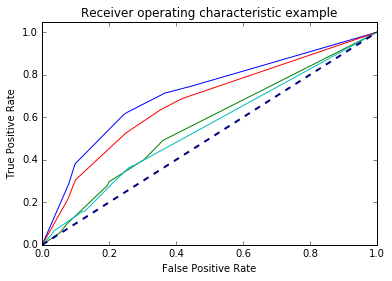

start..perform..
start random ...
{0: 0.87705935899351928, 1: 0.67046467828362366, 2: 0.84468474826914031, 3: 0.61156094245582238}


/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


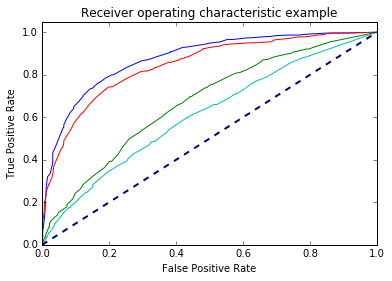

start..perform..
start random ...
{0: 0.91708048584976143, 1: 0.73565464136603409, 2: 0.89647260312338961, 3: 0.65001642501132761}


/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


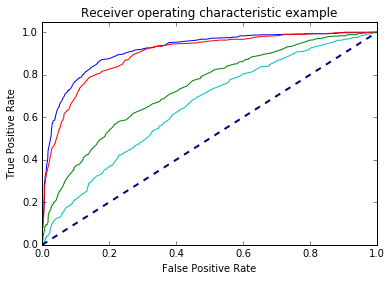

Total runtime is  0:00:55.858639


In [34]:

#perform_evaluate function to run each model and plot roc curve on the fpr, tpr
def performPlot_evaluate(fun, *args):
    #fit Model
    print("start..perform..")
    Y_predict = fun(*args)
    
    # Binarize the output
    y_bin = label_binarize(Y_test, classes=[1, 2, 3, 4])

    #Calculate AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], Y_predict.iloc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    print(roc_auc)
    plotRoc(fpr, tpr)
    return roc_auc


startTime = datetime.now()
print ("Begin time is ",startTime)
for i in [1,5,10]:
    performrandom_evaluate(random,2*i)
print ("Total runtime is ",datetime.now() - startTime)



### KNN

In [27]:
def knn(n_neighbors_):
    print("start knn ...")
    clf = OneVsRestClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=n_neighbors_, p=2,
           weights='uniform'))
    clf.fit(X_train,Y_train)
    Y_predict = clf.predict_proba(X_test)
    return Y_predict

startTime = datetime.now()
print ("Begin time is ",startTime)
perform_evaluate(knn,420)
print ("Total runtime is ",datetime.now() - startTime)


Begin time is  2016-10-12 21:04:00.047597
start..perform..
start knn ...
{0: 0.96814973574446694, 1: 0.89563655758060612, 2: 0.96052596569648907, 3: 0.82478307657453553}
Total runtime is  0:01:36.762558


### RandomForest Classifier

In [ ]:
def random(_n_estimators):
    print("start random ...")
    clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = _n_estimators,random_state=5))
    clf.fit(X_train,Y_train)
    Y_predict = clf.predict_proba(X_test)
    
    return Y_predict

### Logistic Regression

In [ ]:

def logreg():
    print("start logistic reg ...")
    clf = LogisticRegression()
    clf.fit(X_train,Y_train)
    Y_predict = clf.predict_proba(X_test)
    return Y_predict


### Neural Network

In [ ]:

def neural_network(hidden_layer_sizes):
    print("start neural net ...")

    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(hidden_layer_sizes,), random_state=1)  # tried 

    clf.fit(X_train,Y_train)
    Y_predict = clf.predict_proba(X_test)
    return Y_predict

### SVC

In [ ]:
def SVC(C=C,gamma=gamma):
    print("start SVC ...")
    clf = svm.SVC(
        C=C,                # **** Parameter            
        cache_size=200,     # The size of the kernel cache (in MB).
        class_weight=None, # Set the parameter C of class i to class_weight[i]*C for SVC
        coef0=0.0,         # Independent term in kernel function. Only significant in ‘poly’ and ‘sigmoid’.
        degree=3,          # **** Parameter   Degree of the polynomial kernel function (‘poly’); default = 3. Ignored by all other kernels.
        gamma=gamma,      # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’; auto = 1/n_features
        kernel='rbf',     # Specifies the kernel type to be used in the algorithm; default = 'rbf'  'linear', 'poly', 'rbf', 'sigmoid'
        max_iter=-1,      # Hard limit on iterations within solver, or -1 for no limit; default = -1
        probability=True, # Whether to enable probability estimates; default = False
        random_state=None, # To set a random state for replicability
        shrinking=True,   # Whether to use the shrinking heuristic; default = True
        tol=0.001,        # Tolerance for stopping criterion; default = 0.001
        verbose=False     # Enable verbose output; default = False
    )

    clf.fit(X_train,Y_train)
    Y_predict = clf.predict_proba(X_test)
    return Y_predict

### Perform evaluate with average score output for 4 classes

In [18]:


def perform_evaluate(fun, *args):
    #fit Model
    print("start..perform..")
    Y_predict = fun(*args)
    
    # Binarize the output
    y_bin = label_binarize(Y_test, classes=[1, 2, 3, 4])

    #Calculate AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], Y_predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        score = sum(roc_auc.values())/len(roc_auc)

    print(roc_auc)
    print("average score : ",score)
    return roc_auc


start..perform..
start neural net ...
{0: 0.97760892898387297, 1: 0.90747185346300319, 2: 0.9612552093836122, 3: 0.86300974173085632}
CPU times: user 6min 13s, sys: 55.3 s, total: 7min 8s
Wall time: 5min 24s


{0: 0.97760892898387297,
 1: 0.90747185346300319,
 2: 0.9612552093836122,
 3: 0.86300974173085632}

## Sample : Perform and Evaluate model : 
*** WARNING : Take long time to run ***
- by using function and parameters allow us to adjust and easily rerun the model.

In [ ]:

start_time = time.time()

%time perform_evaluate(random,2)   #{0: 0.95755745500532141, 1: 0.94345356758244103, 2: 0.95754489510952012, 3: 0.935902875654121}
                                     #--- 2.9770100116729736 seconds ---
perform_evaluate(random,zero_df)
perform_evaluate(random,median_df,5)  # {0: 0.9982521308236898, 1: 0.99652273206303477, 2: 0.99791378804250441, 3: 0.99512053825347679}
                                       #--- 7.494149923324585 seconds ---
perform_evaluate(random,median_df,50)  # {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}
                                       # --- 78.22237992286682 seconds ---   
    
perform_evaluate(random,mean_df,5)  #{0: 0.99833924590300338, 1: 0.99604780111208036, 2: 0.99806369204357537, 3: 0.99555991668734445}
                                    #--- 7.500859975814819 seconds ---

perform_evaluate(knn,zero_df)     #{0: 0.97897801558343589, 1: 0.93253620366304002, 2: 0.95956900499412578, 3: 0.90881167952825881}
                                  #--- 861.4793829917908 seconds ---
perform_evaluate(knn,median_df)
perform_evaluate(knn,mean_df)

perform_evaluate(logreg,median_df) # {0: 0.97269143043321871, 1: 0.90720546399653845, 2: 0.96431666118072079, 3: 0.86457219682998632}
                                   #--- 12.327923059463501 seconds ---
            
perform_evaluate(SVC,median_df) # {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
                                #--- 1765.4267420768738 seconds --- clf = svm.SVC(kernel='rbf', gamma=10,probability=True)

perform_evaluate(SVC,median_df) # {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}
                                #--- 2026.6871221065521 seconds ---
    
print("--- %s seconds ---" % (time.time() - start_time))  

%time perform_evaluate(random,2) # 2.68 {0: 0.68575227911905756, 1: 0.55929314899539151, 2: 0.6764549164258028, 3: 0.54278375623017672}
%time perform_evaluate(knn)     # 1 min42s {0: 0.92566063883265626, 1: 0.68605131794961538, 2: 0.88637487116578173, 3: 0.6310455369279564}
%time perform_evaluate(SVC)     # 19 mins 13s {0: 0.9556597557164791, 1: 0.79592448144536943, 2: 0.93129390166028114, 3: 0.74194154961486192}
%time perform_evaluate(logreg)  # 4.12 s {0: 0.96586823906634245, 1: 0.88281123694759034, 2: 0.9581456834935359, 3: 0.83349342999546905}


### Using Range - grib to help find best model

In [ ]:

k_range = list(range(1, 26))
,40,50,60,70,80,90,

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

knn_scores = []
k_range = [416,417,418,419]   # winner 420 0.9427807072   {0: 0.96873259242150456, 1: 0.8981012025300632, 2: 0.96150832661154806, 3: 0.8317121658359764}
k_range = list(range(420, 430))
for i in k_range:
    print("i=",i)
    %time knn_scores.append(perform_evaluate(knn,i))

%time perform_evaluate(neural_network) # {0: 0.92266279907069004, 1: 0.87447352850487936, 2: 0.93218628867827291, 3: 0.79489805165382865}
%time perform_evaluate(knn,420)
%time perform_evaluate(neural_network) 

## Grid Search for best model: 

In [ ]:
start_time = time.time()
print("start..MLP  with std test ")
best_score = 0

for solver_ in ['sgd']:   #'adam','sgd','lbfgs'
    print("start..MLP with solver", solver_)
    for learning_rate_ in ['constant', 'invscaling', 'adaptive']:  #activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
        # for each combination of parameters, train 
        print("start..MLP with learning", learning_rate_)
        
        clf = MLPClassifier( solver=solver_, alpha=1e-5,learning_rate =learning_rate_,
                         hidden_layer_sizes=(14771,), random_state=1)
        
        clf.fit(X_train,Y_train)
        Y_predict = clf.predict_proba(X_test)
        print("start..perform..")

        # Binarize the output
        y_bin = label_binarize(Y_test, classes=[1, 2, 3, 4])

        #Calculate AUC
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(4):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], Y_predict[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
        avg_score = sum(roc_auc.values())/len(roc_auc)
        print(roc_auc)
        print("average score: = ", avg_score)

        print("--- %s seconds ---" % (time.time() - start_time))
        
        #  store the high score and its parameters
        if avg_score > best_score:
            best_score = avg_score
            best_parameters = {'solver': solver_, 'learning_rate': learning_rate_}


print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


start..MLP adam. with std test 
start..MLP with solver sgd
start..MLP with learning constant


## Grid Search for different parameter grid

In [38]:
param_grid = {"hidden_layer_sizes": [1000, 10000],
               "activation": ["relu", "logistic"],
              "solver": ["sgd"],
              "alpha":[1e-5]}

clf=MLPClassifier(random_state=1)
dt_clf = grid_search.GridSearchCV(clf, param_grid, cv=3, scoring = 'accuracy')
dt_clf.fit(X_train,Y_train)


YPred = dt_clf.predict(X_test)
print (sm.accuracy_score(Y_test,YPred))
Y_predict = clf.predict_proba(X_test)
y_bin = label_binarize(Y_test, classes=[1, 2, 3, 4])

#Calculate AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], Y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc)


/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Applications/Anaconda/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimizatio

0.771768316072


NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### Use stardized training data with best model

In [173]:
start_time = time.time()

print("start..MLP adam. with std test ")
clf = MLPClassifier( solver='adam', alpha=1e-5, #sgd  lbfgs   activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’},
                 hidden_layer_sizes=(14771,), random_state=1)

clf.fit(X_train,Y_train)
Y_predict = clf.predict_proba(X_test)
print("start..perform..")

# Binarize the output
y_bin = label_binarize(Y_test, classes=[1, 2, 3, 4])

#Calculate AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], Y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc)
print("average score: = ", sum(roc_auc.values())/len(roc_auc))

print("--- %s seconds ---" % (time.time() - start_time))

start..MLP adam. with std test 
start..perform..
{0: 0.98173647813268494, 1: 0.91655874730201581, 2: 0.96510763258721521, 3: 0.87247734481196182}
average score: =  0.933970050708
--- 366.88647198677063 seconds ---


### Use 95% percentile features selected with best model

In [149]:
start_time = time.time()

print("start..selected 95% features.")
clf = MLPClassifier( solver='adam', alpha=1e-5,    #sgd  lbfgs   activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’},
                 hidden_layer_sizes=(14771,), random_state=1)

clf.fit(X_train_selected,Y_train)
Y_predict = clf.predict_proba(X_test_selected)
print("start..perform..")

# Binarize the output
y_bin = label_binarize(Y_test, classes=[1, 2, 3, 4])

#Calculate AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], Y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc)

print("--- %s seconds ---" % (time.time() - start_time))

start..selected 95% features.
start..perform..
{0: 0.9825564175373287, 1: 0.91507954365525812, 2: 0.96511393426093961, 3: 0.87021182600815583}
--- 326.72764897346497 seconds ---


### Use model-based features selected with best model

In [170]:
start_time = time.time()

print("start..selected model features.")
clf = MLPClassifier( solver='adam', alpha=1e-5,    #sgd  lbfgs   activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’},
                 hidden_layer_sizes=(14771,), random_state=1)

clf.fit(X_train_l1,Y_train)
Y_predict = clf.predict_proba(X_test_l1)
print("start..perform..")

# Binarize the output
y_bin = label_binarize(Y_test, classes=[1, 2, 3, 4])

#Calculate AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], Y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc)
print("average score: = ", sum(roc_auc.values())/len(roc_auc))

print("--- %s seconds ---" % (time.time() - start_time))

start..selected model features.
start..perform..
{0: 0.98173647813268494, 1: 0.91655874730201581, 2: 0.96510763258721521, 3: 0.87247734481196182}
average score: =  0.933970050708
--- 342.8405849933624 seconds ---


## Instantiate best model found
- We found our best model is MLPClassifier by using grib search select get best optimal model at 14771 hidden layers with one dimension and evaluate model with best features being all features having solver = 'adam'

In [26]:
print("start ..")

clf = MLPClassifier( solver='adam', alpha=1e-5,    
                 hidden_layer_sizes=(14771,), random_state=1)

clf.fit(X_train,Y_train)


start ..


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(14771,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## K-fold cross validation

In [31]:
# Binarize the output
y_bin = label_binarize(Y_test, classes=[1, 2, 3, 4])

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
for i in range(4):
    print("\nCross-validation 5 fold scores for {} :\n{}"\
          .format(i,cross_val_score(clf, X_test, y_bin[:,i], cv=kfold, scoring='roc_auc').mean()))


Cross-validation 5 fold scores for 0 :
0.953510677808041

Cross-validation 5 fold scores for 1 :
0.8313751463090112

Cross-validation 5 fold scores for 2 :
0.9412866980800396

Cross-validation 5 fold scores for 3 :
0.7673225935188038


## File Submission

In [35]:

Xtest = pd.read_csv("testData.txt",sep="\t",header=None)

Xtest = Xtest.fillna(Xtest.median())      # Use median for missing as train dataset
std_scale = StandardScaler().fit(Xtest)   # Then standarize data as train dataset 
Xtest = std_scale.transform(Xtest)

y_final_prob = clf.predict_proba(Xtest)
y_final_label = clf.predict(Xtest)

sample = pd.DataFrame(np.hstack([y_final_prob.round(5),y_final_label.reshape(y_final_prob.shape[0],1)]))
sample.columns = ["prob1","prob2","prob3","prob4","label"]
sample.label = sample.label.astype(int)

#Submit this file to dropbox
sample.to_csv("Piyawan_Ayada_final_oct12_.csv",sep="\t" ,index=False,header=None)